In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 


%matplotlib inline

## a)

Build a Linear Regression Model to predict y from all the X variables (X1 to X50).

Use TTS with a 90/10 split (since data is large)
z-score your predictors
record the MSE/R2 for both training/test sets

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW4_1.csv")

In [ ]:
# getting the names of all of the columns
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'y'],
      dtype='object')

In [ ]:
predictors = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50']

outcome = 'y'

In [ ]:
## TTS
X_train, X_test, y_train, y_test = train_test_split(df[predictors],df[outcome], train_size = 0.9)

In [ ]:
# z-scoring
z_obj = StandardScaler()
X_train[predictors] = z_obj.fit_transform(X_train[predictors])
X_test[predictors] = z_obj.transform(X_test[predictors])

In [ ]:
# creating and fitting linear regression object/model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predictions

# train
y_pred_train = lr.predict(X_train)

# test
y_pred_test = lr.predict(X_test)

In [ ]:
# R^2 values

# train
training_R2 = lr.score(X_train, y_train)

# test
testing_R2 = lr.score(X_test, y_test)

In [ ]:
# MSE

# train
training_mse = mean_squared_error(y_train, y_pred_train)

# test
testing_mse = mean_squared_error(y_test, y_pred_test)

In [ ]:
print("MSE VALUES")
print("----------------------")
print("Train: ", training_mse)
print("Test: ", testing_mse)
print("-----------------------------------------")
print("R^2 VALUES")
print("Train: ", training_R2)
print("Test: ", testing_R2)

MSE VALUES
----------------------
Train:  3.8931037784528932
Test:  4.091937410534007
-----------------------------------------
R^2 VALUES
Train:  0.9990590849994502
Test:  0.9990732157262734


## b)

Build a NEW Linear Regression Model, but using PCA:

Using the same train/test split from a...
z-score your predictors (if not already z scored)
train PCA on the training set.
make a cumulative variance plot
Figure out how many PCs you need to keep to retain 90% of the original variance.
Use the fitted PCA model (with the number of components you decided on above) to create those component scores for both training and test set. DO NOT refit the PCA model on the test set.
fit your model using these components and record the MSE/R2 for both training/test sets

In [ ]:
pca = PCA()
pca.fit(X_train)

PCA()

In [ ]:
pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,51),
                      "cumulative_variance":
                      pca.explained_variance_ratio_.cumsum()})
pcaDF.head(20)

,expl_var,pc,cumulative_variance
0,0.427772,1,0.427772
1,0.392780,2,0.820552
2,0.007649,3,0.828201
3,0.006394,4,0.834595
4,0.006116,5,0.840711
5,0.006021,6,0.846733
6,0.005799,7,0.852532
7,0.005565,8,0.858097
8,0.005484,9,0.863580
9,0.005336,10,0.868917


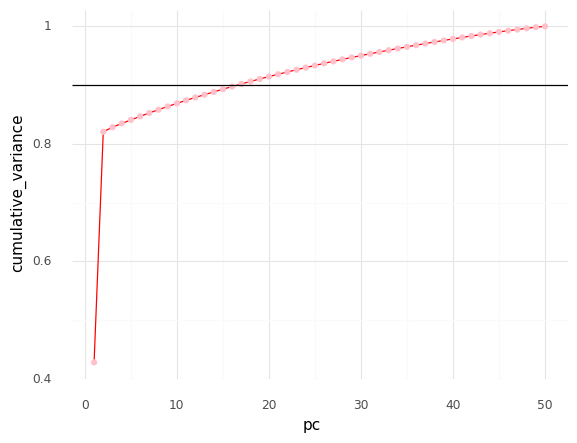

<ggplot: (8759475984391)>

In [ ]:
(ggplot(pcaDF, aes(x = "pc", y = "cumulative_variance")) + geom_line(color = "red") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.9) + theme_minimal())

To obtain 90% of the original in the first linear regression model, we will keep 16 principal components.

In [ ]:
pcomps16_train = pca.transform(X_train)
pcomps16_train = pd.DataFrame(pcomps16_train[:, 0:16])

pcomps16_test = pca.transform(X_test)
pcomps16_test = pd.DataFrame(pcomps16_test[:, 0:16])

In [ ]:
lr2 = LinearRegression()
lr2.fit(pcomps16_train, y_train)
print("MSE and R^2 with 16 PCs")
print("----------------------------------------")
print("MSE VALUES")
print("-----------------")
print("Train: ", mean_squared_error(y_train, lr2.predict(pcomps16_train)))
print("Test: ", mean_squared_error(y_test, lr2.predict(pcomps16_test)))
print("-----------------------------")
print("R^2 Scores")
print("-----------------")
print("Train R^2:   ", lr2.score(pcomps16_train, y_train))
print("Test R^2:   ", lr2.score(pcomps16_test, y_test))

MSE and R^2 with 16 PCs
----------------------------------------
MSE VALUES
-----------------
Train:  36.66491789455597
Test:  39.396538005526644
-----------------------------
R^2 Scores
-----------------
Train R^2:    0.9914199447824252
Test R^2:    0.9878398420333528


## c)

Thouroughly discuss whether for this data set you would choose to use the full data, or the Principal Components selected in part b, what are the advantages/disadvantages?

### Summary: I would use the original linear model, primarily because I do not need this model to make fast predictions and the R^2 scores are almost identitical. We also see that the MSE values for the model with dimensionality reduction are much larger than those of the original mode. Normally, using PCA would help us combat overfitting, but we do not need this benefit because the first model does not suffer from overfitting.
### PCA Advantages and Disadvantages:

#### Advantages:
1. Increased computational efficiency.
2. Helps combat overfitting by only keeping the most important predictors in the dataset.

#### Disadvantages:
1. Difficult to interpret the coefficients of principal components because each PC has a little bit of information from every original predictor. If we wanted to have easier interpretability, we might use factor analysis instead.
2. Forces us to necessarily reduce the explained variance of our model; we need to trade some R^2 for efficiency.

### Simple Linear Model Advantages:

#### Advantages:
1. Easy to intrepret coefficients of predictors.
2. High R^2 and low MSE

#### Disadvantages:
1. Slower algorithm because it uses all of the predictors in the model.

In [30]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Homework3.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/CPSC392/HW3.ipynb" ./

# Again, replace "Homework3.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "HW3.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
texlive is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes